In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)

In [2]:
df = pd.read_csv('telecom_churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
print(df.shape)

(3333, 21)


In [4]:
print(df.columns)

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
df.describe()



,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [7]:
df.describe(include=['object', 'bool'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,382-4657,no,no,False
freq,106,1,3010,2411,2850


In [8]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [9]:
df['churn'].value_counts(normalize=True)

False    0.86
True     0.14
Name: churn, dtype: float64

In [10]:
df['churn'].mean()

0.14491449144914492

In [11]:
df[df['churn'] == True]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,417-1488,no,no,0,280.0,113,47.60,...,90,17.19,156.8,103,7.06,10.4,4,2.81,0,True
3304,IL,71,510,330-7137,yes,no,0,186.1,114,31.64,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True
3320,GA,122,510,411-5677,yes,no,0,140.0,101,23.80,...,77,16.69,120.1,133,5.40,9.7,4,2.62,4,True
3322,MD,62,408,409-1856,no,no,0,321.1,105,54.59,...,122,22.57,180.5,72,8.12,11.5,2,3.11,4,True


In [12]:
df[df['churn'] == True].mean()

C:\Users\Michael\AppData\Local\Temp/ipykernel_112800/26685644.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['churn'] == True].mean()


account length            102.66
area code                 437.82
number vmail messages       5.12
total day minutes         206.91
total day calls           101.34
total day charge           35.18
total eve minutes         212.41
total eve calls           100.56
total eve charge           18.05
total night minutes       205.23
total night calls         100.40
total night charge          9.24
total intl minutes         10.70
total intl calls            4.16
total intl charge           2.89
customer service calls      2.23
churn                       1.00
dtype: float64

In [13]:
df[df['churn'] == False].mean()

C:\Users\Michael\AppData\Local\Temp/ipykernel_112800/3839778232.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['churn'] == False].mean()


account length            100.79
area code                 437.07
number vmail messages       8.60
total day minutes         175.18
total day calls           100.28
total day charge           29.78
total eve minutes         199.04
total eve calls           100.04
total eve charge           16.92
total night minutes       200.13
total night calls         100.06
total night charge          9.01
total intl minutes         10.16
total intl calls            4.53
total intl charge           2.74
customer service calls      1.45
churn                       0.00
dtype: float64

In [14]:
df[df['churn'] == True]['total day minutes'].mean()

206.91407867494814

In [15]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [16]:
df.sort_values(by='total day charge').head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,...,102,21.59,242.7,156,10.92,9.2,5,2.48,3,False
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,...,100,14.57,186.5,80,8.39,12.9,2,3.48,2,False
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,False


In [17]:
pd.set_option('display.max_rows', None)

In [18]:
df.sort_values(by='total day charge').head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,...,102,21.59,242.7,156,10.92,9.2,5,2.48,3,False
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,...,100,14.57,186.5,80,8.39,12.9,2,3.48,2,False
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,False


In [19]:
df.sort_values(by='total day charge')


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
1345,SD,98,415,392-2555,no,no,0,0.0,0,0.00,...,130,13.57,167.1,88,7.52,6.8,1,1.84,4,True
1397,VT,101,510,413-7655,no,no,0,0.0,0,0.00,...,119,16.33,168.8,95,7.60,7.2,4,1.94,1,False
2736,OK,127,510,403-1128,no,yes,27,2.6,113,0.44,...,102,21.59,242.7,156,10.92,9.2,5,2.48,3,False
2753,OH,134,415,406-4158,no,no,0,7.8,86,1.33,...,100,14.57,186.5,80,8.39,12.9,2,3.48,2,False
1986,WI,70,415,405-9233,no,no,0,7.9,100,1.34,...,83,11.59,156.6,89,7.05,12.1,1,3.27,0,False
1052,OR,98,415,378-6772,yes,no,0,12.5,67,2.13,...,90,21.81,169.4,88,7.62,7.7,9,2.08,1,False
2252,NH,148,408,333-7449,no,no,0,17.6,121,2.99,...,125,13.74,203.1,82,9.14,10.6,6,2.86,1,False
3046,MI,110,510,357-5784,no,no,0,18.9,92,3.21,...,81,21.96,109.6,74,4.93,14.8,4,4.00,1,False
1621,SC,138,510,370-9533,no,yes,21,19.5,149,3.32,...,109,11.98,179.7,111,8.09,7.9,1,2.13,0,False
1076,WY,53,415,337-4339,no,yes,27,25.9,119,4.40,...,96,17.55,228.1,64,10.26,6.5,7,1.76,1,False


In [20]:
df[df['churn'] == True]['customer service calls'].mean()

2.229813664596273

In [21]:
df[df['churn'] == False]['total day minutes'].mean()

175.17575438596492

In [22]:
df[df['churn'] == True]['customer service calls'].mean()

2.229813664596273

In [23]:
df[df['churn'] == False]['customer service calls'].mean()

1.4498245614035088

In [25]:
df[df['churn'] == False]['number vmail messages'].mean()

8.604561403508772

In [26]:
df[df['churn'] == True]['number vmail messages'].mean()

5.115942028985507

In [27]:
df[df['churn'] == True]['total day minutes'].mean()

206.91407867494814

In [31]:
T = df[df['churn'] == True]['total day minutes'].mean()
F = df[df['churn'] == False]['total day minutes'].mean()
display(T)
display(F)

206.91407867494814

175.17575438596492

In [32]:
df[df['churn'] == False]['total day minutes'].mean()

175.17575438596492

In [33]:
T = df[df['churn'] == True]['total day calls'].mean()
F = df[df['churn'] == False]['total day calls'].mean()
display(T)
display(F)

101.33540372670808

100.28315789473685

In [34]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [35]:
T = df[df['churn'] == True]['total day charge'].mean()
F = df[df['churn'] == False]['total day charge'].mean()
display(T)
display(F)

35.17592132505176

29.780421052631663

In [36]:
T = df[df['churn'] == True]['total eve minutes'].mean()
F = df[df['churn'] == False]['total eve minutes'].mean()
display(T)
display(F)

212.41014492753618

199.04329824561412

In [37]:
T = df[df['churn'] == True]['total eve charge'].mean()
F = df[df['churn'] == False]['total eve charge'].mean()
display(T)
display(F)

18.054968944099382

16.918908771929825

In [38]:
T = df[df['churn'] == True]['total night minutes'].mean()
F = df[df['churn'] == False]['total night minutes'].mean()
display(T)
display(F)

205.2316770186334

200.13319298245688

In [39]:
T = df[df['churn'] == True]['total night calls'].mean()
F = df[df['churn'] == False]['total night calls'].mean()
display(T)
display(F)

100.39958592132506

100.05824561403509

In [40]:
T = df[df['churn'] == True]['total night charge'].mean()
F = df[df['churn'] == False]['total night charge'].mean()
display(T)
display(F)

9.235527950310564

9.006073684210536

In [41]:
T = df[df['churn'] == True]['total intl minutes'].mean()
F = df[df['churn'] == False]['total intl minutes'].mean()
display(T)
display(F)

10.699999999999996

10.158877192982445

In [42]:
T = df[df['churn'] == True]['total intl calls'].mean()
F = df[df['churn'] == False]['total intl calls'].mean()
display(T)
display(F)

4.163561076604555

4.532982456140351

In [43]:
T = df[df['churn'] == True]['total intl charge'].mean()
F = df[df['churn'] == False]['total intl charge'].mean()
display(T)
display(F)

2.889544513457558

2.7434035087719235

In [44]:
T = df[df['churn'] == True]['customer service calls'].mean()
F = df[df['churn'] == False]['customer service calls'].mean()
display(T)
display(F)

2.229813664596273

1.4498245614035088

In [45]:
pd.crosstab(df['churn'], df['international plan'])

international plan,no,yes
churn,,
False,2664,186
True,346,137


In [46]:
pd.crosstab(df['churn'], df['customer service calls'])

customer service calls,0,1,2,3,4,5,6,7,8,9
churn,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0
True,92,122,87,44,76,40,14,5,1,2


In [47]:
# some imports to set up plotting 
import matplotlib.pyplot as plt
# pip install seaborn 
import seaborn as sns
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

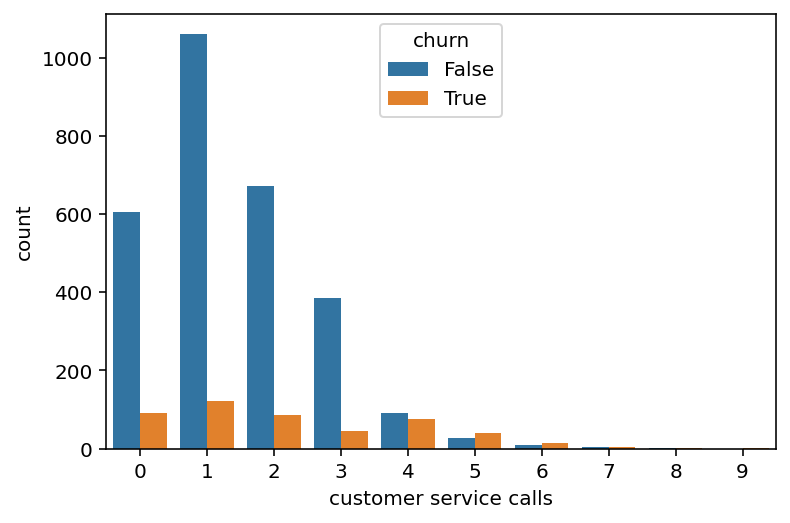

In [49]:
sns.countplot(x='customer service calls', hue='churn', data=df);

In [50]:
sns.countplot(x='customer service calls', hue=['churn'] = True, data=df);

SyntaxError: invalid syntax (Temp/ipykernel_112800/4227578544.py, line 1)

In [53]:
pd.crosstab(df[['churn'] == True], df['customer service calls'])

KeyError: False

In [65]:
pd.crosstab(df['churn'], columns = (df['customer service calls'] , df['international plan']), values = df['churn'] == True, aggfunc = 'sum').fillna(0)

TypeError: can only concatenate list (not "tuple") to list

In [66]:
df['service_calls'] = (df['customer service calls'] > 3).astype('int')

In [67]:
pd.crosstab(df['service_calls'], df['churn'], margins=True)

churn,False,True,All
service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


In [74]:
pd.crosstab(df['service_calls'] & (df['international plan'] == 'yes') , df['churn'])

churn,False,True
row_0,,
False,2841,464
True,9,19
